In [71]:
import sys
import os
home=os.getcwd()
sys.path.append(home+'/Functions')
from ChargeDataSet import *
from MS1IDs import *
from NumpyMSPeaksIdentification import *
from ShowDF import *
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt

In [64]:
DataSetName='12111.mzML'

In [65]:
DataSet=ChargeDataSet(DataSetName)

In [66]:
MS1IDVec=MS1IDs(DataSet)

137.60853067782


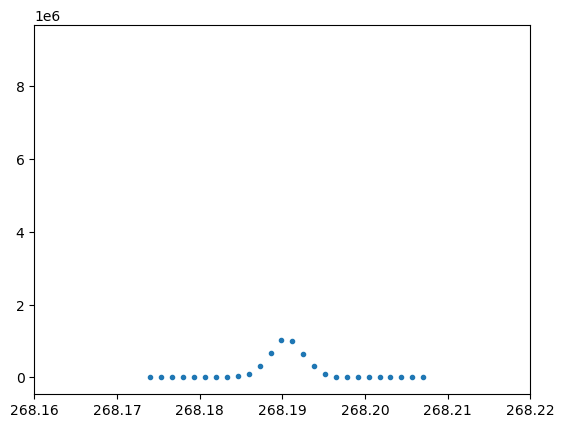

In [67]:
FirstSpec=True
#for ms1_id in MS1IDVec[345]:
ms1_id=MS1IDVec[345]
Spectrum=np.array(DataSet[int(ms1_id)].get_peaks()).T 
print(DataSet[int(ms1_id)].getRT())
plt.xlim([268.16,268.22])
plt.plot(Spectrum[:,0],Spectrum[:,1],'.')

if FirstSpec:
    RawSignals=Spectrum
    FirstSpec=False
else:
    RawSignals=np.append(RawSignals,Spectrum,axis=0)
plt.show()        
    #print(ms1_id)

In [81]:
Spect=NumpyMSPeaksIdentification(RawSignals)

In [72]:
ShowDF(pd.DataFrame(Spect))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,100.076,0.000460356,7,0.000645086,6.44599,-40,0,1,199304,0.279601,100.075,100.076,0,0,0
1,100.112,0.000480627,8,0.000594658,5.93993,-40,0,1,175603,0.168091,100.111,100.113,149.59,3.01738,0
2,100.988,0.00042302,5,0.000871004,8.6248,-40,0,1,51555,0.212051,100.988,100.989,3446.67,3.20558,0
3,101.008,0.000466395,7,0.000653548,6.47025,-40,0,1,242343,0.294115,101.008,101.009,76.7302,3.22418,0
4,101.06,0.000480264,8,0.000594209,5.87979,-40,0,1,269329,0.156809,101.059,101.06,209.86,3.01888,0
5,102.091,0.000461812,6,0.000760195,7.44623,-40,0,1,66676.6,0.349173,102.091,102.092,4066.12,3.09702,0
6,102.948,0.000464643,6,0.000764856,7.42956,-40,0,1,64195.5,0.336033,102.947,102.948,3201.8,3.1693,0
7,102.97,0.000482546,8,0.000597033,5.79811,-40,0,1,247368,0.173378,102.97,102.971,88.492,3.09745,0
8,103.039,0.000417861,5,0.000860381,8.35006,-40,0,1,40488.9,0.333193,103.038,103.04,271.667,3.1971,0
9,103.075,0.00058661,9,0.000656101,6.36526,-40,0,1,784124,0.113192,103.075,103.076,134.448,3.1072,0


In [28]:
RTval

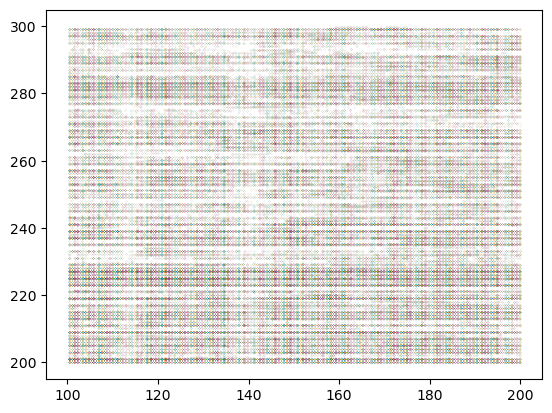

In [10]:
RT=[]
MinMZ=200
MaxMZ=300
MinRT=100
MaxRT=200
for spectrum in DataSet:
    ML=spectrum.getMSLevel()
    RTval=spectrum.getRT()
    RTFil=(RTval>MinRT)&(RTval<MaxRT)
    if (ML==1)&RTFil:        
        RT.append(RTval)
        RawSignals=np.array(spectrum.get_peaks()).T 
        MZFil=np.where((RawSignals[:,0]>MinMZ)&(RawSignals[:,0]<MaxMZ))[0]
        SignalWindow=RawSignals[MZFil,:]
        Nsignals=int(len(SignalWindow[:,0]))
        #print(Nsignals)
        RTvec=RTval*np.ones(Nsignals)
        plt.plot(RTvec,SignalWindow[:,0],'.',ms=0.01)
plt.show()       
#print(len(RT),max(RT))    

In [8]:
RawSignals[:,0]

array([ 54.50554558,  54.50602877,  54.50651198,  54.50699518,
        64.54266593,  64.54328856,  64.5439112 ,  64.54453386,
        64.54515652,  64.54577919,  64.54640186,  64.54702455,
        64.54764725,  64.54820958,  64.54883229,  64.54945502,
        64.55007775,  73.04027172,  73.04102128,  73.04177085,
        73.04252044,  73.04327003,  73.04401964,  73.04476926,
        73.04551889,  73.04626853,  73.04701818,  73.04776784,
        73.04851752,  73.04926721,  73.05001691,  73.05080787,
        73.05155759,  73.05230732,  73.05305707,  91.04839331,
        91.04943652,  91.05047975,  91.05152299,  91.05256626,
        91.05360954,  91.05465284,  91.05569616,  91.0567395 ,
        91.05778285,  91.05882622,  91.05986961,  91.06091302,
        91.06195645,  91.06311398,  91.06415744,  91.06520092,
        91.06624442, 102.20585772, 102.20709845, 102.20833921,
       102.20957998, 102.21082078, 102.2120616 , 102.21330244,
       102.21454331, 102.21578419, 102.21704198, 102.21

In [36]:
mz_points=int(1e7)
RT_points=100
mzMat=np.zeros((mz_points,RT_points))

In [37]:
sys.getsizeof(mzMat)

8000000120

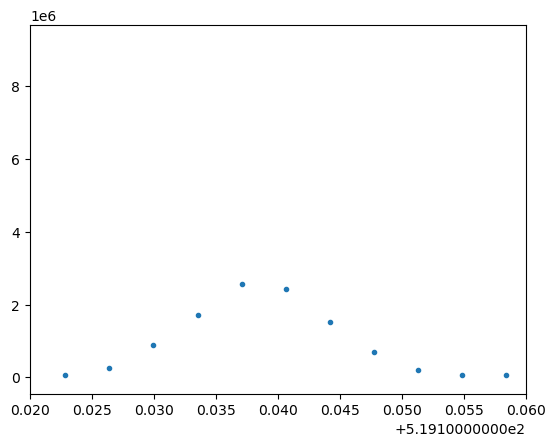

In [85]:
plt.xlim([519.12,519.16])
plt.plot(RawSignals[:,0],RawSignals[:,1],'.')

plt.show()

In [80]:
minInt=1e2
minIntPeak=1e4
mz_Tol=1e-3
minSignals=4
def Centroids(RawSignals,minInt=1e2,minIntPeak=1e4,mz_Tol=1e-3,minSignals=4)
    # Add an intensity filter
    IntensityFilterLocator=RawSignals[:,1]>minInt
    IntensityFilter=np.where(IntensityFilterLocator)[0]
    Signals=RawSignals[IntensityFilter,:]
    ResidualSignals=Signals.copy()
    #Find the signal with the highest intensity
    maxInt=1e6
    FeaturesVec=[]
    while maxInt>minIntPeak:
        NFeatureSignals=0
        mz_Tol_Times=0
        while NFeatureSignals<minSignals:
            mz_Tol_Times+=1
            N_Old_Signals=len(ResidualSignals)
            maxInt=np.max(ResidualSignals[:,1])
            maxIntLocator=ResidualSignals[:,1]==maxInt
            mz_maxIntFilter=np.where(maxIntLocator)[0]
            mz_Feature=float(ResidualSignals[mz_maxIntFilter,0])
            minmz_Feature=mz_Feature-mz_Tol*mz_Tol_Times
            maxmz_Feature=mz_Feature+mz_Tol*mz_Tol_Times
            FeatureSignalsLocator=(ResidualSignals[:,0]>minmz_Feature)&(ResidualSignals[:,0]<maxmz_Feature)
            FeatureSignals=ResidualSignals[FeatureSignalsLocator,:]
            NFeatureSignals=len(FeatureSignals[:,0])
        MaxInt_FeatureLocator=(ResidualSignals[:,0]<minmz_Feature)|(ResidualSignals[:,0]>maxmz_Feature)
        ResidualSignals=ResidualSignals[MaxInt_FeatureLocator,:]
        N_New_Signals=len(ResidualSignals)
        FeaturesVec.append(mz_Feature)
        print(mz_Feature,NFeatureSignals,mz_Tol_Times)
    return FeaturesVec

264.19531646917187 5 3
159.01293985141535 7 2
215.12492252562018 5 2
254.05877092560888 5 3
519.1370648726769 5 8
120.05550773517538 5 1
173.02852603174995 5 2
445.1201566036932 5 6
264.19918383318696 4 4
189.10238458337847 5 2
377.1462073587984 5 5
265.1985383394216 5 3
520.1395783631745 5 8
264.1914491900724 4 4
297.1597595771995 5 4
268.18988812610075 5 3
141.00251097028993 7 2
521.1378534459319 5 8
446.1197027070774 5 6
254.06241786444747 4 4
215.12776412383937 4 3
157.01782999697767 7 2
122.05985034054532 5 1
195.08776410477216 5 2
170.09628035327947 7 2
519.1477174272899 4 11
158.01667256140388 7 2
224.9636457521105 5 3
276.0407292952578 5 3
116.98577350801888 5 1
174.1848718751167 5 2
371.10100933060806 5 5
161.0101074831086 7 2
334.2120654215663 5 4
282.27939382340503 5 3
189.10004270931915 4 3
172.04271231863214 5 2
377.13961133267884 4 7
378.1513052047576 5 5
160.01262100555115 7 2
593.1550767324326 5 9
173.03057578820665 5 3
447.11618546049203 5 6
171.1493166848549 5 2
265.2

432.08471873822526 5 6
284.9303686145962 5 3
280.26723651875005 4 299
174.03866052131437 4 15
276.03107549755737 4 101
225.15924269317506 5 3
148.97587325614404 6 2
449.1204863837586 4 989
136.02271802007795 5 24
372.23014270594444 5 5
118.94262011264857 5 1
282.2252222093123 4 10
168.99746784723516 6 2
110.06005323801799 5 1
197.06004988783448 5 2
249.15635751594138 4 961
173.961491293491 5 2
208.94909859227766 5 2
172.95201914594892 5 2
270.9079001180613 5 3
272.899666862175 4 10
431.0673461593979 5 6
471.36164700260395 4 22
113.01887287344636 5 1
219.04799414474894 5 2
105.03328251724163 7 1
201.11438437048997 4 6
372.318548560879 5 5
182.00727044194068 5 73
120.10291524868528 4 3
189.12661226828783 4 3
123.96300212998057 5 1
130.98297733061972 4 4
125.02338243277278 5 1
667.1606768576336 4 37
142.0055275383178 4 1
296.25916316355415 5 4
112.07549687334101 5 1
169.01791455403222 7 2
176.07246628993352 4 5
940.0148480584577 5 18
182.18797361219202 4 6
290.9628952386453 5 3
196.088498

In [80]:
minInt=1e2
minIntPeak=1e4
mz_Tol=1e-3
minSignals=4
# Add an intensity filter
IntensityFilterLocator=RawSignals[:,1]>minInt
IntensityFilter=np.where(IntensityFilterLocator)[0]
Signals=RawSignals[IntensityFilter,:]
ResidualSignals=Signals.copy()
#Find the signal with the highest intensity
maxInt=1e6
FeaturesVec=[]
while maxInt>minIntPeak:
    NFeatureSignals=0
    mz_Tol_Times=0
    while NFeatureSignals<minSignals:
        mz_Tol_Times+=1
        N_Old_Signals=len(ResidualSignals)
        maxInt=np.max(ResidualSignals[:,1])
        maxIntLocator=ResidualSignals[:,1]==maxInt
        mz_maxIntFilter=np.where(maxIntLocator)[0]
        mz_Feature=float(ResidualSignals[mz_maxIntFilter,0])
        minmz_Feature=mz_Feature-mz_Tol*mz_Tol_Times
        maxmz_Feature=mz_Feature+mz_Tol*mz_Tol_Times
        FeatureSignalsLocator=(ResidualSignals[:,0]>minmz_Feature)&(ResidualSignals[:,0]<maxmz_Feature)
        FeatureSignals=ResidualSignals[FeatureSignalsLocator,:]
        NFeatureSignals=len(FeatureSignals[:,0])
    MaxInt_FeatureLocator=(ResidualSignals[:,0]<minmz_Feature)|(ResidualSignals[:,0]>maxmz_Feature)
    ResidualSignals=ResidualSignals[MaxInt_FeatureLocator,:]
    N_New_Signals=len(ResidualSignals)
    FeaturesVec.append(mz_Feature)
   # FeatureSignals=N_Old_Signals-N_New_Signals
    print(mz_Feature,NFeatureSignals,mz_Tol_Times)
#print(mz_maxIntFilter)

264.19531646917187 5 3
159.01293985141535 7 2
215.12492252562018 5 2
254.05877092560888 5 3
519.1370648726769 5 8
120.05550773517538 5 1
173.02852603174995 5 2
445.1201566036932 5 6
264.19918383318696 4 4
189.10238458337847 5 2
377.1462073587984 5 5
265.1985383394216 5 3
520.1395783631745 5 8
264.1914491900724 4 4
297.1597595771995 5 4
268.18988812610075 5 3
141.00251097028993 7 2
521.1378534459319 5 8
446.1197027070774 5 6
254.06241786444747 4 4
215.12776412383937 4 3
157.01782999697767 7 2
122.05985034054532 5 1
195.08776410477216 5 2
170.09628035327947 7 2
519.1477174272899 4 11
158.01667256140388 7 2
224.9636457521105 5 3
276.0407292952578 5 3
116.98577350801888 5 1
174.1848718751167 5 2
371.10100933060806 5 5
161.0101074831086 7 2
334.2120654215663 5 4
282.27939382340503 5 3
189.10004270931915 4 3
172.04271231863214 5 2
377.13961133267884 4 7
378.1513052047576 5 5
160.01262100555115 7 2
593.1550767324326 5 9
173.03057578820665 5 3
447.11618546049203 5 6
171.1493166848549 5 2
265.2

432.08471873822526 5 6
284.9303686145962 5 3
280.26723651875005 4 299
174.03866052131437 4 15
276.03107549755737 4 101
225.15924269317506 5 3
148.97587325614404 6 2
449.1204863837586 4 989
136.02271802007795 5 24
372.23014270594444 5 5
118.94262011264857 5 1
282.2252222093123 4 10
168.99746784723516 6 2
110.06005323801799 5 1
197.06004988783448 5 2
249.15635751594138 4 961
173.961491293491 5 2
208.94909859227766 5 2
172.95201914594892 5 2
270.9079001180613 5 3
272.899666862175 4 10
431.0673461593979 5 6
471.36164700260395 4 22
113.01887287344636 5 1
219.04799414474894 5 2
105.03328251724163 7 1
201.11438437048997 4 6
372.318548560879 5 5
182.00727044194068 5 73
120.10291524868528 4 3
189.12661226828783 4 3
123.96300212998057 5 1
130.98297733061972 4 4
125.02338243277278 5 1
667.1606768576336 4 37
142.0055275383178 4 1
296.25916316355415 5 4
112.07549687334101 5 1
169.01791455403222 7 2
176.07246628993352 4 5
940.0148480584577 5 18
182.18797361219202 4 6
290.9628952386453 5 3
196.088498

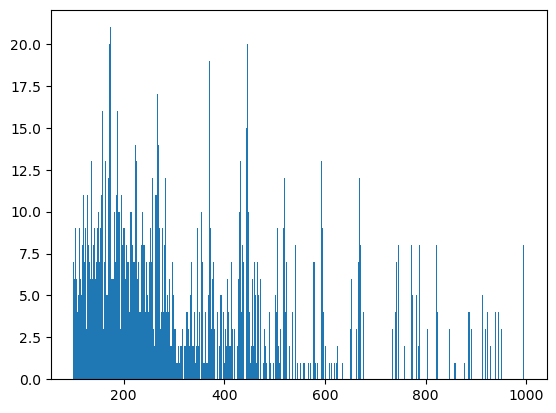

In [37]:
plt.hist(FeaturesVec,bins=500)
plt.show()

In [47]:
FeaturesVec.sort()
NPFeat=np.array(FeaturesVec)

In [51]:
print(min(FeaturesVec),max(FeaturesVec))

100.03914930046912 996.0889879379104


In [50]:
np.min(NPFeat[1:]-NPFeat[:-1])

0.005015725930320514

In [82]:
len(FeaturesVec)

955

In [18]:
DifVec=Signals[1:,0]-Signals[:-1,0]
FilDifVec=np.where(DifVec<0.005)[0]
DifVec2=DifVec[FilDifVec]

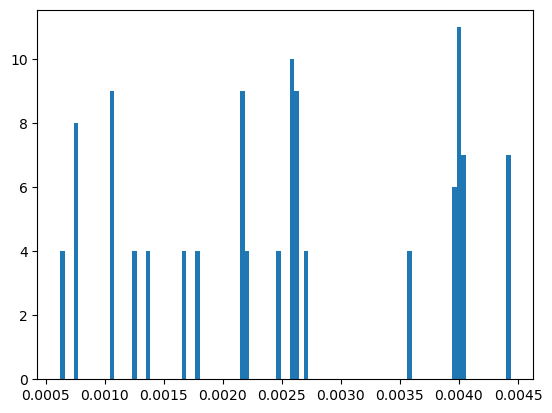

In [19]:
#plt.xlim([0,1])
plt.hist(DifVec2,bins=100)
plt.show()

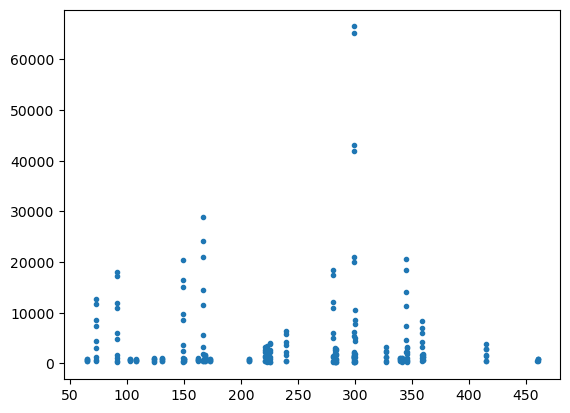

In [28]:
plt.plot(Signals[:,0],Signals[:,1],'.')
plt.show()